# Linear Regression

## Affine function
An affine function (also called a linear function1) of a vector x takes a weighted sum of each
input and adds a constant. For example, for D=3 inputs x = [x1 x2 x3],a general (scalar)affine function is:
    $$f(x;w,b)=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+b=w^{T}x+b$$
where **w** is the weights, which can be used to represent the effect brought by the input features, which are represented by **x** in this equation, and the **b** is the bias( or offset), which can be used to ensure the performance of a model.

## Least Square Error function
The least square error function is a very classic model, which is widely used in the filed of regression.The model can be expressed simply as:
$$L(w,b)=(y-f(w,b))^{2}$$,where $f(w,b)$ is the line we create to try to fitt the data points. The general function can be expressed as:
$$\sum_{n=1}^{N}[(y^{(n)}-f(x^{(n)};w,b))]=(y-f)^{T}(y-f)$$, where **N** is the number of samples.The least-squares fitting problem is finding the parameters that minimize this error.

**Fitting line with b=0**
<br>
To make the math simpler,we will temporarily assume our function goes through the origin.That is, we’ll assume b = 0. Thus we are fitting the “linear map”:
$$y\approx f=Xw$$, so we need to find **w** to minmize the least squre error mentioned above. In **numpy** we can use **np.linalg.lstsq()** function.

**np.linalg.lstsq()**
<br>
Let's say we have a **1x4** array of input features **X**:


In [3]:
import numpy as np
x = np.array([0, 1, 2, 3])
x

array([0, 1, 2, 3])

And we have crresponding output **Y**:

In [7]:

y = np.array([-1, 0.2, 0.9, 2.1])
y

array([-1. ,  0.2,  0.9,  2.1])

We Assume that **Y** is a linear function, which can be expressed as:
$$y=kx+b$$
Imagine, for one type of feature(for example, area for determine the price of an apartment):$$X=[\text{x1 x2 x3 x4}]$$
And output Y::$$Y=[\text{y1 y2 y3 y4}]$$
To fit put both of them into the linear function,we can put x into a column vector and we also add a column of 1 to the colmun vector:
$$ X=\begin{bmatrix}x_{1}&1\\ x_{2}&1\\x_{3}&1\\x_{4}&1\end{bmatrix}$$
We define **C** as regression coefficient:$$C=\begin{bmatrix}w \\ k\end{bmatrix}$$
Thus, we can multiply **X by C**:
$$Y=XC=\begin{bmatrix}wx_{1}+k \\ wx_{2}+k \\ wx_{3}+k \\ wx_{4}+k \end{bmatrix}$$
we can use **np.vstack** or **np.concatenate()** to achieve that

In [28]:
A = np.vstack([x, np.ones(len(x))])
A

array([[0., 1., 2., 3.],
       [1., 1., 1., 1.]])

Then we can use **np.linalg.lstsq()** to find the regression coefficients:


In [10]:
[k,b]=np.linalg.lstsq(A,y,rcond=None)[0]
[k,b]

[0.9999999999999997, -0.949999999999999]

To prove the coefficients do make the line fit into those points, we can visualize them:


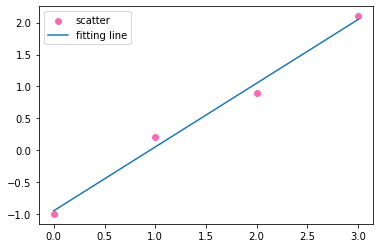

In [13]:
import matplotlib.pyplot as plt
fitting=[]
for i in range(len(x)):
    fitting.append(x.item(i)*k+b)
plt.scatter(x,y,color = 'hotpink',label="scatter")
plt.plot(x,fitting,label='fitting line')
plt.legend()
plt.show()

In [ ]:
**Fitting more general functions**
